<a href="https://colab.research.google.com/github/Noelchannayil/Mobile_Communication/blob/main/EXP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Interpretation:
Importing libraries to plot the graph

In [ ]:
num_subcarriers = 64 # Number of subcarriers (N)
num_symbols = 10 # Number of OFDM symbols (M)
cp_len = 16 # Length of Cyclic Prefix (CP)
mod_order = 4 # QAM modulation order (e.g., QPSK -> 4)

Interpretation:
Declaration of parameters.

In [ ]:
data = np.random.randint(0, mod_order, size=(num_symbols,
num_subcarriers))
qam_symbols = np.exp(1j * 2 * np.pi * data / mod_order)


Interpretation:
Using numpy library to generates a 2D array of random integers.
Qam_symbols is parameter used for QPSK waves. In this array will be a complex-valued array
where each element is a point on the unit circle in the complex plane. Each column
corresponds to a subcarrier, and each row corresponds to a different OFDM symbol.

In [ ]:
# Perform IFFT on each OFDM symbol (modulate subcarriers)
ifft_output = np.fft.ifft(qam_symbols, axis=1)


Interpretation:
IFFT transforms the frequency domain QAM symbols into a time-domain signal suitable for
transmission. Resulting time-domain signals can be transmitted simultaneously over a
single channel without interference, taking advantage of the orthogonal properties of the
subcarriers.


In [ ]:
# Add Cyclic Prefix (CP)
cyclic_prefix = ifft_output[:, -cp_len:]
ofdm_symbols_with_cp = np.hstack([cyclic_prefix, ifft_output])

Interpretation:
The code extracts the last samples from the IFFT output to form a cyclic prefix and then
prepends this prefix to the original signal. This step is crucial for maintaining signal
integrity in an OFDM system, especially in environments prone to multipath propagation.
The resulting ofdm_symbols_with_cp is now ready for transmission over a communication
channel, having been properly prepared for robustness and synchronization.


In [ ]:
# Flatten into a 1D signal for transmission
ofdm_signal = ofdm_symbols_with_cp.flatten()


Interpretation:
The code flattens the 2D array of OFDM symbols (including the cyclic prefix) into a 1D
array, preparing it for transmission. This step ensures that the data is in a format
compatible with communication systems, facilitating easier processing and transmission of
the signal.


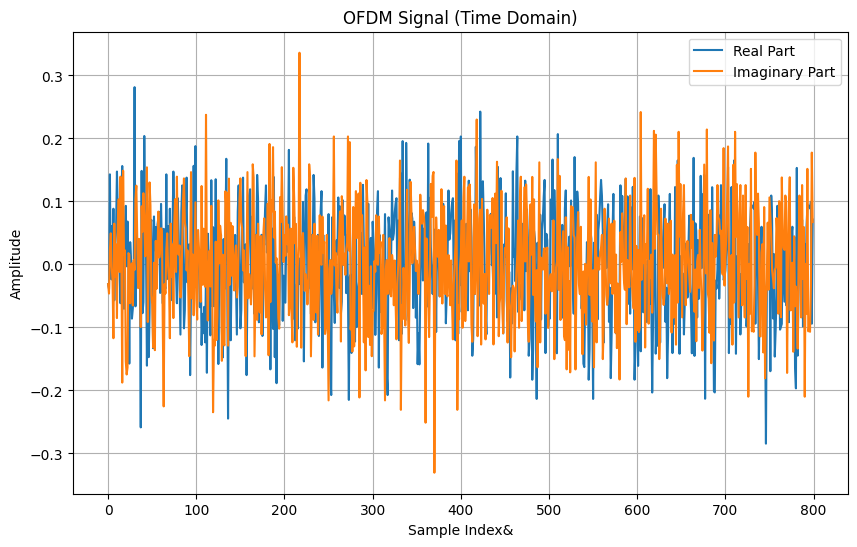

In [ ]:
# Plot the real and imaginary parts of the OFDM signal
plt.figure(figsize=(10, 6))
plt.plot(np.real(ofdm_signal), label="Real Part")
plt.plot(np.imag(ofdm_signal), label="Imaginary Part")
plt.title("OFDM Signal (Time Domain)")
plt.xlabel("Sample Index&")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


Interpretation:
Signal is plotted in form of graph using matplotlib library where real part and imaginary
part is plotted.
ofdm_symbols_with_cp: This is a 2D NumPy array containing multiple OFDM symbols, each
consisting of subcarriers and a cyclic prefix. Its shape is (num_symbols, num_subcarriers
+ cp_len).
flatten(): This method converts the 2D array into a 1D array by stacking all the elements
in a single line.